# Importe

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import statsmodels.api as sm

plt.style.use('classic')

# Funktionen

In [4]:
def lin_reg(x,a,b):
  y = a*x+b
  return y

- $\chi^2/dof > 1$: zu kleine Fehler
- $\chi^2/dof < 1$: zu große Fehler
- Gleichung: $$ \frac{\chi^2}{dof} =  \frac{1}{n-p}\sum_i^n \frac{(f(x_i)-y_i)^2}{u_{y_i}^2}$$
  - p: Anzahl der Fitparameter

In [5]:
def chi_sq(x,y,fx,u_y): # für 2 Fitparameter
  """
  x: x values for the x axis
  y: y values for the y axis
  fx: y values from the regression
  u_y: Unsicherheit/uncertainty from y
  """
  n = len(y)
  factor = 1/(n-2)
  return factor * np.sum((fx-y)**2/u_y**2)


In [6]:
def reg_wls(x,y,uy,a_round=3,b_round=3,r_round=4):
  '''
  Returning variables:
  a:    from a*x+b
  ua:   uncertainty of a
  b:    from a*x+b
  ub:   uncertainty of b
  R:    R square
  chi:  chi square
  '''
  # calculating regression
  X = sm.add_constant(x)
  model = sm.WLS(y,X,weights=uy)
  results = model.fit()
  print(results.summary())

  # Parameters
  a = round(results.params[1],a_round)
  b = round(results.params[0],b_round)
  ua = round(results.bse[1],a_round)
  ub = round(results.bse[0],b_round)
  R = round(results.rsquared,r_round)

  # lin. Reg.
  f_x = a*x+b

  # chi square
  chi = round(chi_sq(x,y,f_x,uy),3)

  return a,ua,b,ub,R,chi

def reg_ols(x,y,a_round=3,b_round=3,r_round=4):
  '''
  Returning variables:
  a:    from a*x+b
  ua:   uncertainty of a
  b:    from a*x+b
  ub:   uncertainty of b
  R:    R square
  '''
  # calculating regression
  X = sm.add_constant(x)
  model = sm.OLS(y,X)
  results = model.fit()
  print(results.summary())

  # Parameters
  a = round(results.params[1],a_round)
  b = round(results.params[0],b_round)
  ua = round(results.bse[1],a_round)
  ub = round(results.bse[0],b_round)
  R = round(results.rsquared,r_round)

  return a,ua,b,ub,R

# Daten

In [7]:
!wget https://github.com/Ben-physics-dotcom/Internships/raw/main/GPR1/Data/M12-Saitenschwinung.xlsx

--2024-03-10 17:49:41--  https://github.com/Ben-physics-dotcom/Internships/raw/main/GPR1/Data/M12-Saitenschwinung.xlsx
Resolving github.com (github.com)... 20.27.177.113
Connecting to github.com (github.com)|20.27.177.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Ben-physics-dotcom/Internships/main/GPR1/Data/M12-Saitenschwinung.xlsx [following]
--2024-03-10 17:49:41--  https://raw.githubusercontent.com/Ben-physics-dotcom/Internships/main/GPR1/Data/M12-Saitenschwinung.xlsx
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6174 (6.0K) [application/octet-stream]
Saving to: ‘M12-Saitenschwinung.xlsx’

M12-Saitenschwinung 100%[===================>]   6.03K  --.-KB/s    in 0s      

2024-03-10 17

In [8]:
path = '/content/M12-Saitenschwinung.xlsx'
xl = pd.ExcelFile(path)
xl.sheet_names

['Resonanzmessung', 'MR_2_MR_3']

In [9]:
df1 = pd.read_excel(xl,'Resonanzmessung')
df2 = pd.read_excel(xl,'MR_2_MR_3')

In [10]:
df2.head()

,Unnamed: 0,L [cm],f1 [Hz],Masse [g],f3 [Hz],info
0,0,25.0,235.70,1000,77.88,zwei unterschiedliche messreihen in einem sheet
1,1,30.0,187.00,950,76.39,n=k=3
2,2,35.0,156.50,750,69.11,"für f3 ist die Saitenlänge 0.6m und n=1,k=3"
3,3,40.0,117.20,650,63.95,NaN
4,4,45.0,103.93,550,59.68,NaN


# Aufgabe 1

In [11]:
df1.head()

,Unnamed: 0,n,f_n[Hz],info
0,0,1,78.48,"Gewicht: 1kg, 3 kerbe"
1,1,2,157.00,NaN
2,2,3,234.80,NaN
3,3,4,314.30,NaN
4,4,5,393.40,NaN


In [12]:
n1 = np.array(df1['n'])
fn = np.array(df1['f_n[Hz]'])
ufn = fn*0.008 # 0.8 prozentige Fehlerabschätzung.

Aus den Notizen ist nicht mehr erkennbar, wie groß ich den Fehler abgeschätzt habe. Daher habe ich mit Hilfe des $\chi^2$ die Fehler auf 0.8\% abgeschätzt.

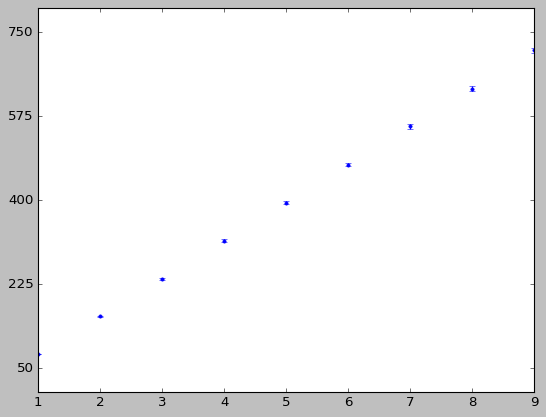

In [13]:
plt.errorbar(n1,fn,
             fmt='.',
             yerr=ufn,
             capsize=3,label='Data')
plt.yticks([50,225,400,575,750])
# plt.xlabel('n')
# plt.ylabel('f(n)')
plt.show()

In [14]:
Xn = sm.add_constant(n1)
model = sm.WLS(fn,Xn,weights=ufn)
results = model.fit()
print(results.summary())

                            WLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            WLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.364e+06
Date:                Sun, 10 Mar 2024   Prob (F-statistic):           8.91e-20
Time:                        17:49:43   Log-Likelihood:                -5.2917
No. Observations:                   9   AIC:                             14.58
Df Residuals:                       7   BIC:                             14.98
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.2887      0.455     -5.027      0.0

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [15]:
a1 = round(results.params[1],2)
print(a1)
b1 = round(results.params[0],1)
ua1 = round(results.bse[1],2)
ub1 = round(results.bse[0],1)
R1 = round(results.rsquared,3)
R1

79.21


1.0

In [16]:
# chi square
fx1 = a1*n1+b1
chi = round(chi_sq(n1,fn,fx1,ufn),2)
chi

0.98

In [17]:
n_reg = np.linspace(0.5,9.5,100)
fn_reg = a1*n_reg+b1

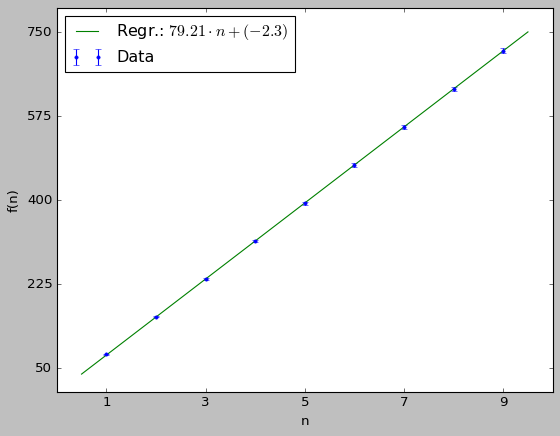

In [40]:
plt.errorbar(n1,fn,
             fmt='.',
             yerr=ufn,
             capsize=3,label='Data')

plt.plot(n_reg,fn_reg,label=f'Regr.: ${a1}\cdot n + ({b1})$')
plt.legend(loc=2)
plt.yticks([50,225,400,575,750])
plt.xticks([1,3,5,7,9])
plt.xlabel('n')
plt.ylabel('f(n)')
# plt.show()
plt.savefig('M12-A1.png',dpi=600,transparent=True)

# Aufgabe 2 und 3

In [19]:
df2.head()

,Unnamed: 0,L [cm],f1 [Hz],Masse [g],f3 [Hz],info
0,0,25.0,235.70,1000,77.88,zwei unterschiedliche messreihen in einem sheet
1,1,30.0,187.00,950,76.39,n=k=3
2,2,35.0,156.50,750,69.11,"für f3 ist die Saitenlänge 0.6m und n=1,k=3"
3,3,40.0,117.20,650,63.95,NaN
4,4,45.0,103.93,550,59.68,NaN


## A2

Text(0, 0.5, 'f [Hz]')

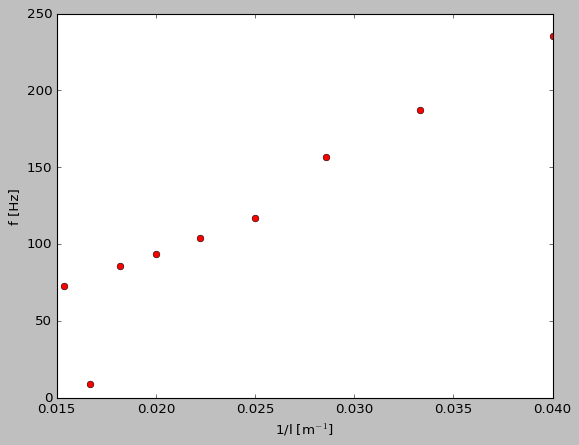

In [20]:
plt.plot(1/df2['L [cm]'],df2['f1 [Hz]'],'ro')
plt.xlabel('1/l [m$^{-1}$]')
plt.ylabel('f [Hz]')

In [21]:
f1 = np.array(df2['f1 [Hz]'])[:9]
uf1 = 0.1*f1
print(len(f1))
print(uf1)
l = 1/np.array(df2['L [cm]'])
L = sm.add_constant(l[:9])
model2 = sm.WLS(f1,L,weights=uf1)
results2 = model2.fit()
print(results2.summary())

9
[23.57  18.7   15.65  11.72  10.393  9.372  8.557  0.876  7.264]
                            WLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.982
Model:                            WLS   Adj. R-squared:                  0.980
Method:                 Least Squares   F-statistic:                     384.2
Date:                Sun, 10 Mar 2024   Prob (F-statistic):           2.25e-07
Time:                        17:49:44   Log-Likelihood:                -32.410
No. Observations:                   9   AIC:                             68.82
Df Residuals:                       7   BIC:                             69.21
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [22]:
a2 = round(results2.params[1],2)
print(a2)
b2 = round(results2.params[0],1)
ua2 = round(results2.bse[1],2)
ub2 = round(results2.bse[0],1)
R2 = round(results2.rsquared,3)
R2

7072.99


0.982

In [23]:
# chi square
l = l[:9]
fx2 = a2*l+b2
chi2 = round(chi_sq(l,f1,fx2,uf1),2)
chi2

680.32

### Versuch Nr. 2

In [24]:
print(f1)

[235.7  187.   156.5  117.2  103.93  93.72  85.57   8.76  72.64]


In [25]:
l = np.array([0.04,0.03333333, 0.02857143 ,0.025 ,     0.02222222, 0.02,
 0.01818182,0.01538462])
f1 = np.array([235.7 ,187. ,  156.5 , 117.2,  103.93 , 93.72 ,
               85.57 ,   72.64])

In [26]:
# f1 = np.array(df2['f1 [Hz]'])[:9]
uf1 = 0.08*f1
print(len(f1))
print(uf1)
# l = 1/np.array(df2['L [cm]'])
L = sm.add_constant(l)
model2 = sm.WLS(f1,L,weights=uf1)
results2 = model2.fit()
print(results2.summary())

8
[18.856  14.96   12.52    9.376   8.3144  7.4976  6.8456  5.8112]


/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


                            WLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.991
Model:                            WLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                     644.0
Date:                Sun, 10 Mar 2024   Prob (F-statistic):           2.47e-07
Time:                        17:49:44   Log-Likelihood:                -25.257
No. Observations:                   8   AIC:                             54.51
Df Residuals:                       6   BIC:                             54.67
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -45.6204      8.138     -5.606      0.0

In [27]:
a2 = round(results2.params[1],2)
print(a2)
b2 = round(results2.params[0],1)
ua2 = round(results2.bse[1],2)
ub2 = round(results2.bse[0],1)
R2 = round(results2.rsquared,3)
R2

6983.26


0.991

In [28]:
# chi square
# l = l[:9]
fx2 = a2*l+b2
chi2 = round(chi_sq(l,f1,fx2,uf1),2)
chi2

0.99

In [29]:
print(l)
l_reg = np.linspace(0.010,0.048,1000)
f1_reg = a2*l_reg+b2

[0.04       0.03333333 0.02857143 0.025      0.02222222 0.02
 0.01818182 0.01538462]


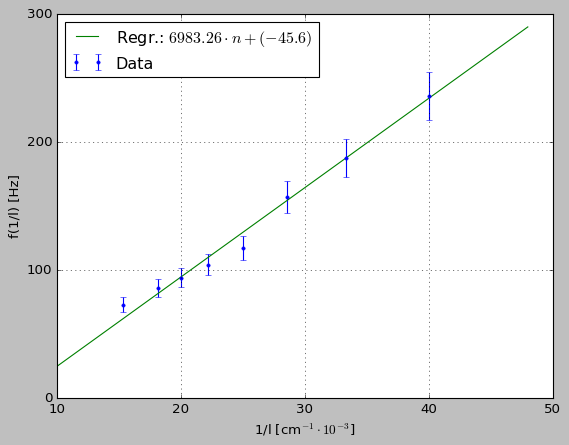

In [30]:
plt.errorbar(l,f1,
             fmt='.',
             yerr=uf1,
             capsize=3,label='Data')

plt.plot(l_reg,f1_reg,label=f'Regr.: ${a2}\cdot n + ({b2})$')
plt.legend(loc=2)
plt.yticks([0,100,200,300])
plt.xticks([.01,.02,0.03,0.04,0.05],[10,20,30,40,50])
plt.xlabel('1/l [cm$^{-1}\cdot 10^{-3}$]')
plt.ylabel('f(1/l) [Hz]')
plt.grid()
# plt.show()
plt.savefig('M12-A2.png',dpi=600,transparent=True)

## A3

In [31]:
df2.head()

,Unnamed: 0,L [cm],f1 [Hz],Masse [g],f3 [Hz],info
0,0,25.0,235.70,1000,77.88,zwei unterschiedliche messreihen in einem sheet
1,1,30.0,187.00,950,76.39,n=k=3
2,2,35.0,156.50,750,69.11,"für f3 ist die Saitenlänge 0.6m und n=1,k=3"
3,3,40.0,117.20,650,63.95,NaN
4,4,45.0,103.93,550,59.68,NaN


**Zugspannung**
- Annahme: $ F_0 = m\cdot g$
- Formel: $f_3^2 = \frac{3}{2} ⋅ \frac{1}{l^2⋅ \mu} F_0$

In [32]:
l0 = 0.6 # m
m = np.array(df2['Masse [g]'])/1000 # kg
um = 0.5/1000
F0 = 9.81*m
uF0 = 9.81*um*np.ones(len(m))
f3 = np.array(df2['f3 [Hz]'])
uf3 = 0.05*f3

Text(0, 0.5, '$f_3$ [Hz]')

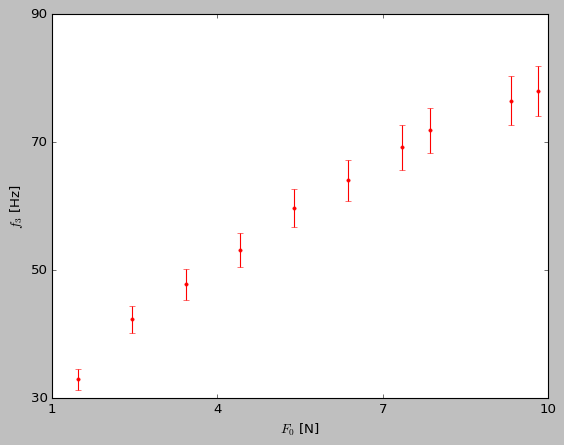

In [33]:
plt.errorbar(F0,f3,
             fmt='.',color='red',
             capsize=3,
            #  xerr=uF0,
             yerr=uf3
             )
plt.xticks([1,4,7,10])
plt.yticks([30,50,70,90])
plt.xlabel('$F_0$ [N]')
plt.ylabel('$f_3$ [Hz]')

### Lineare Regression

In [34]:
lst = reg_wls(F0,f3,uf3,1,1)
# print(lst)

                            WLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.981
Model:                            WLS   Adj. R-squared:                  0.979
Method:                 Least Squares   F-statistic:                     412.1
Date:                Sun, 10 Mar 2024   Prob (F-statistic):           3.62e-08
Time:                        17:49:50   Log-Likelihood:                -20.377
No. Observations:                  10   AIC:                             44.75
Df Residuals:                       8   BIC:                             45.36
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         30.0879      1.743     17.261      0.0

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [35]:
lst

(5.1, 0.3, 30.1, 1.7, 0.981, 1.236)

In [36]:
reg_f0 = np.linspace(1.1,9.9,100)
reg_f3 = lst[0]*reg_f0+lst[2]

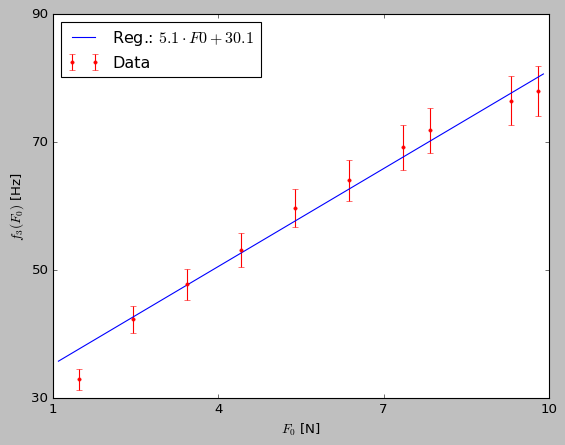

In [38]:
plt.errorbar(F0,f3,
             fmt='.',color='red',
             capsize=3,
            #  xerr=uF0,
             yerr=uf3,
             label='Data'
             )
plt.plot(reg_f0,reg_f3,label=f'Reg.: ${lst[0]}\cdot F0 + {lst[2]}$')
plt.xticks([1,4,7,10])
plt.yticks([30,50,70,90])
plt.xlabel('$F_0$ [N]')
plt.ylabel('$f_3(F_0)$ [Hz]')
plt.legend(loc=2)
plt.savefig('M12-A3.png',dpi=600,transparent=True)